In [1]:
# Dependencies

import pandas as pd

import datetime as dt

import data_outcomes
import matplotlib.pyplot as plt

In [2]:
df_diabetes = data_outcomes.getDiabetesDataframe()
display(df_diabetes)

----> Retrieving information for Resources/diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/2c/vxpllj2s5tb64tggspjj06cw0000gn/T/ipykernel_43889/1705378246.py:32: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Pregnancies'], X_test['Glucose'], c=y_pred, marker='x', label='Predicted', edgecolor='r')


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
[[121  30]
 [ 30  50]]


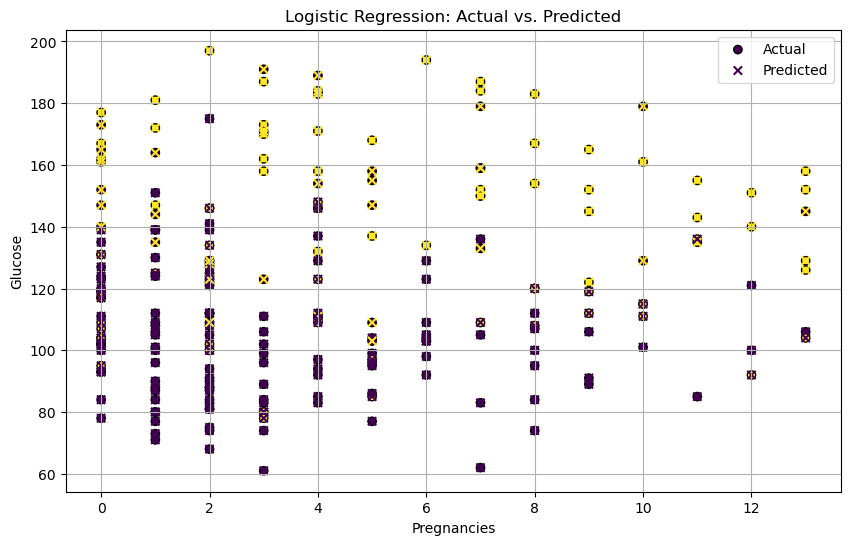

In [18]:
#from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_diabetes[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], df_diabetes['Outcome'], test_size=0.3, random_state=42)

# Initialize the logistic regression model 
model = LogisticRegression() 
# # Fit the model to the training data 
model.fit(X_train, y_train)

# Make predictions on the test data 
y_pred = model.predict(X_test)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
# Classification report 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred)) 
# Confusion matrix 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred))

# Plot the actual vs. predicted values 
plt.figure(figsize=(10, 6)) 
# Scatter plot for actual values 
plt.scatter(X_test['Pregnancies'], X_test['Glucose'], c=y_test, marker='o', label='Actual', edgecolor='k') 
# Scatter plot for predicted values
plt.scatter(X_test['Pregnancies'], X_test['Glucose'], c=y_pred, marker='x', label='Predicted', edgecolor='r') 
# Adding the plot details 
plt.title('Logistic Regression: Actual vs. Predicted') 
plt.xlabel('Pregnancies') 
plt.ylabel('Glucose') 
plt.legend() 
plt.grid(True)

#df_mean_imputed.fillna(df_mean_imputed.mean(), inplace=True)